In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import re
def parse_data(data):
    str_data  = re.findall(r"[-+]?(?:\d*\.*\d+)", data)
    return float(str_data[0])

In [3]:
file_name = "low learning rate.txt"
with open(file_name) as f:
    lines = f.readlines()
    
    log_file_list = list()
    for line in lines:
        if len(line.split(' ')) > 2:
            temp_ = list()
            for data in line.split('-')[2:]:
                temp_.append(parse_data(data))
            log_file_list.append(temp_)
            
    column_name = ['loss', 'loc_loss', 'conf_loss', 'loc_accuracy', 'conf_accuracy', 'val_loss', 'val_loc_loss', 'val_conf_loss', 'val_loc_accuracy', 'val_conf_accuracy']
    
    df = pd.DataFrame(log_file_list, columns = column_name)
    
df.head(10)

,loss,loc_loss,conf_loss,loc_accuracy,conf_accuracy,val_loss,val_loc_loss,val_conf_loss,val_loc_accuracy,val_conf_accuracy
0,16.0655,2.1382,13.9273,0.2592,0.2877,15.5626,1.8492,13.7133,0.1770,0.7955
1,15.0722,1.6601,13.4121,0.1403,0.9109,14.6548,1.6143,13.0405,0.1180,0.9560
2,13.9361,1.4654,12.4707,0.1093,0.9613,13.3222,1.4794,11.8428,0.0946,0.9748
3,12.1916,1.3325,10.8590,0.0922,0.9808,11.4809,1.4007,10.0802,0.0900,0.9878
4,9.9360,1.2368,8.6993,0.0837,0.9897,9.4749,1.3671,8.1078,0.0890,0.9902
5,7.8050,1.1623,6.6428,0.0825,0.9904,7.8591,1.3494,6.5097,0.0888,0.9902
6,6.5334,1.0971,5.4364,0.0839,0.9904,6.8892,1.3015,5.5876,0.0873,0.9902
7,5.9551,1.0318,4.9233,0.0860,0.9904,6.4222,1.2863,5.1359,0.0870,0.9902
8,5.6552,0.9762,4.6790,0.0885,0.9904,6.1270,1.2500,4.8770,0.0890,0.9902
9,5.4419,0.9283,4.5136,0.0912,0.9904,5.9549,1.2313,4.7236,0.0912,0.9903


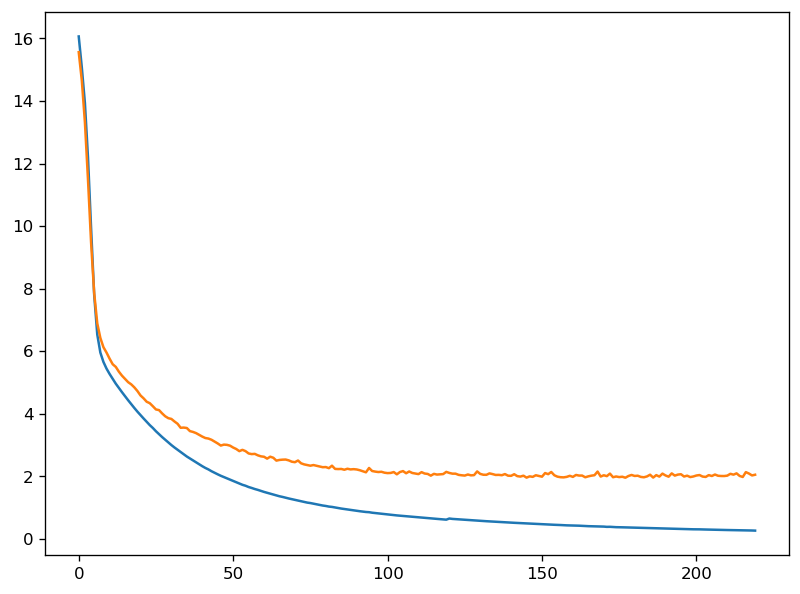

In [4]:
plt.figure(figsize = (8, 6), dpi = 120)
plt.plot(df['loss'])
plt.plot(df['val_loss'])
plt.show()

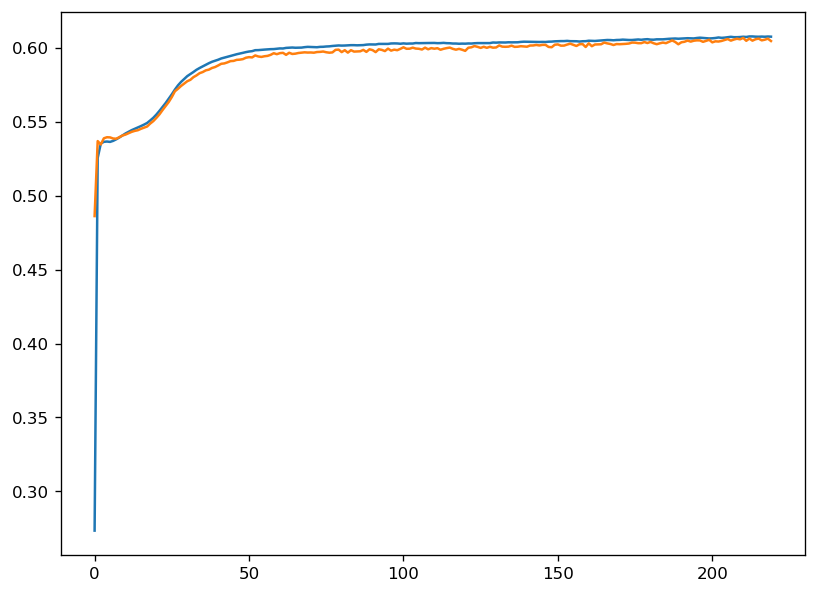

In [5]:
plt.figure(figsize = (8, 6), dpi = 120)
train_accuracy = list(map(lambda x, y: (x + y) / 2, df['loc_accuracy'], df['conf_accuracy']))
validation_accuracy = list(map(lambda x, y: (x + y) / 2, df['val_loc_accuracy'], df['val_conf_accuracy']))
plt.plot(train_accuracy)
plt.plot(validation_accuracy)
plt.show()